In [26]:
import lightgbm as lgb
from lightgbm import plot_tree, plotting
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
%matplotlib inline

In [27]:
df = pd.read_csv('iris.csv', header=None)
#Encode label
label_encoder = preprocessing.LabelEncoder()
df['label'] = label_encoder.fit_transform(df.iloc[:,-1])
#train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

train_data = lgb.Dataset(df_train.iloc[:,:-2], df_train['label'])
test_data = lgb.Dataset(df_test.iloc[:,:-2], df_test['label'])

In [28]:
param = {'num_leaves':5, 'num_trees':2, "num_class": 3, 'objective':'multiclass'}

In [29]:
bst = lgb.train(param, train_data, num_boost_round=10, valid_sets=[test_data])
print("accuracy: {}".format(accuracy_score(df_test['label'], bst.predict(df_test.iloc[:,:-2]).argmax(axis=1))))

[1]	valid_0's multi_logloss: 0.986014
[2]	valid_0's multi_logloss: 0.886304
accuracy: 0.9333333333333333


/home/nguyenbinh/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


# Confusion matrix

In [30]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    cm_count = cm
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}\n{}".format(cm[i, j], cm_count[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

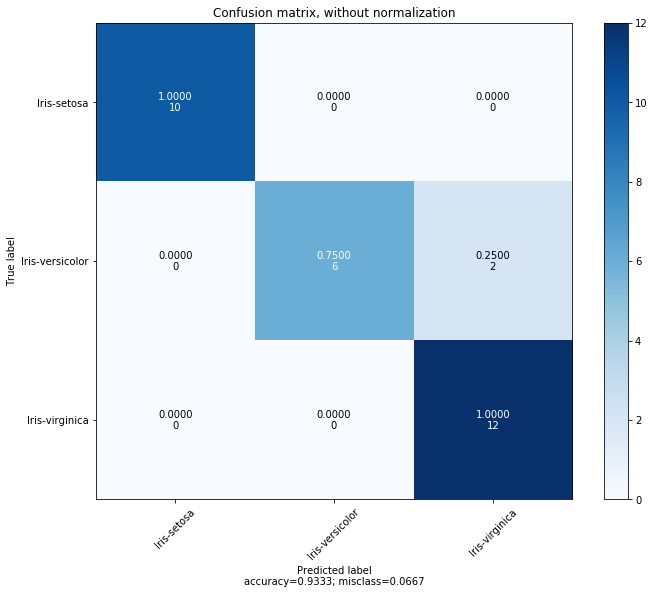

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df_test['label'], bst.predict(df_test.iloc[:,:-2]).argmax(axis=1), labels=label_encoder.transform(label_encoder.classes_))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, target_names=label_encoder.classes_,title='Confusion matrix, without normalization')

# Predict

In [32]:
bst.predict(pd.DataFrame([[5.1,3.5,1.4,0.2], [6.4,2.8,5.6,2.2],[4.9,3.1,1.5,0.1]]))

array([[0.43, 0.3 , 0.27],
       [0.29, 0.3 , 0.41],
       [0.43, 0.3 , 0.27]])

# Plot tree

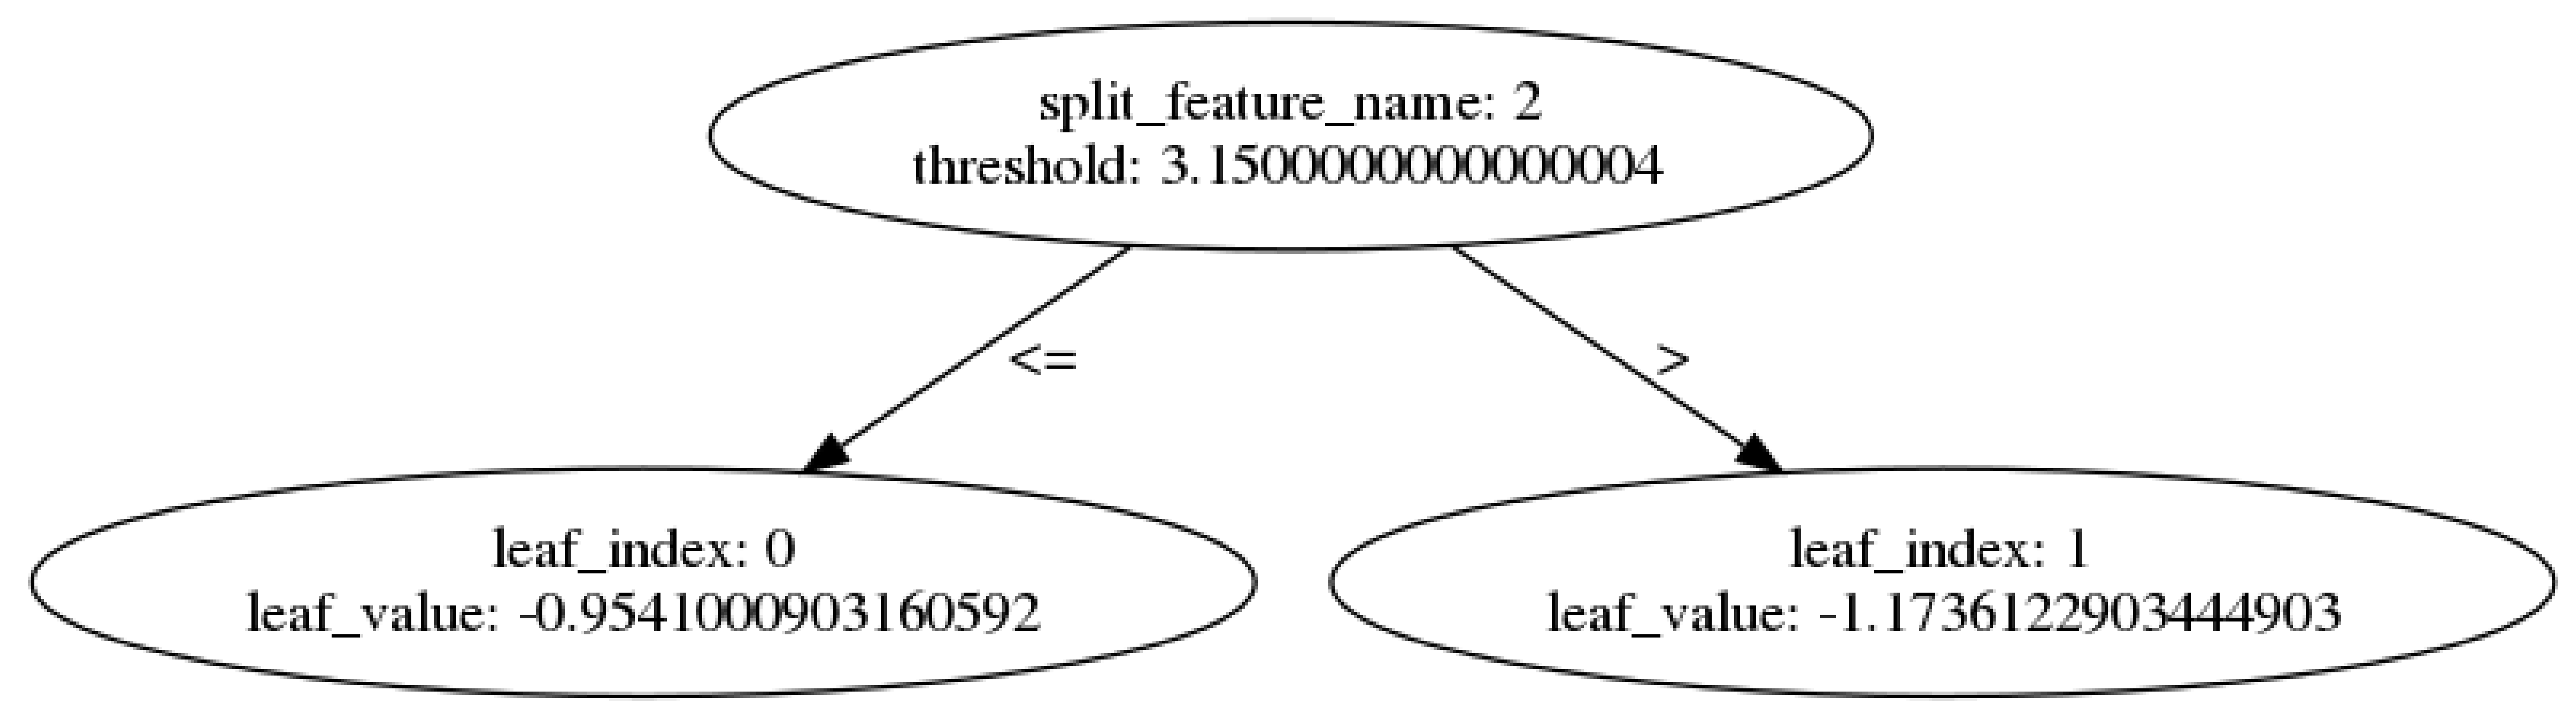

In [33]:
plot_tree(bst, figsize=(100, 100), tree_index=0)

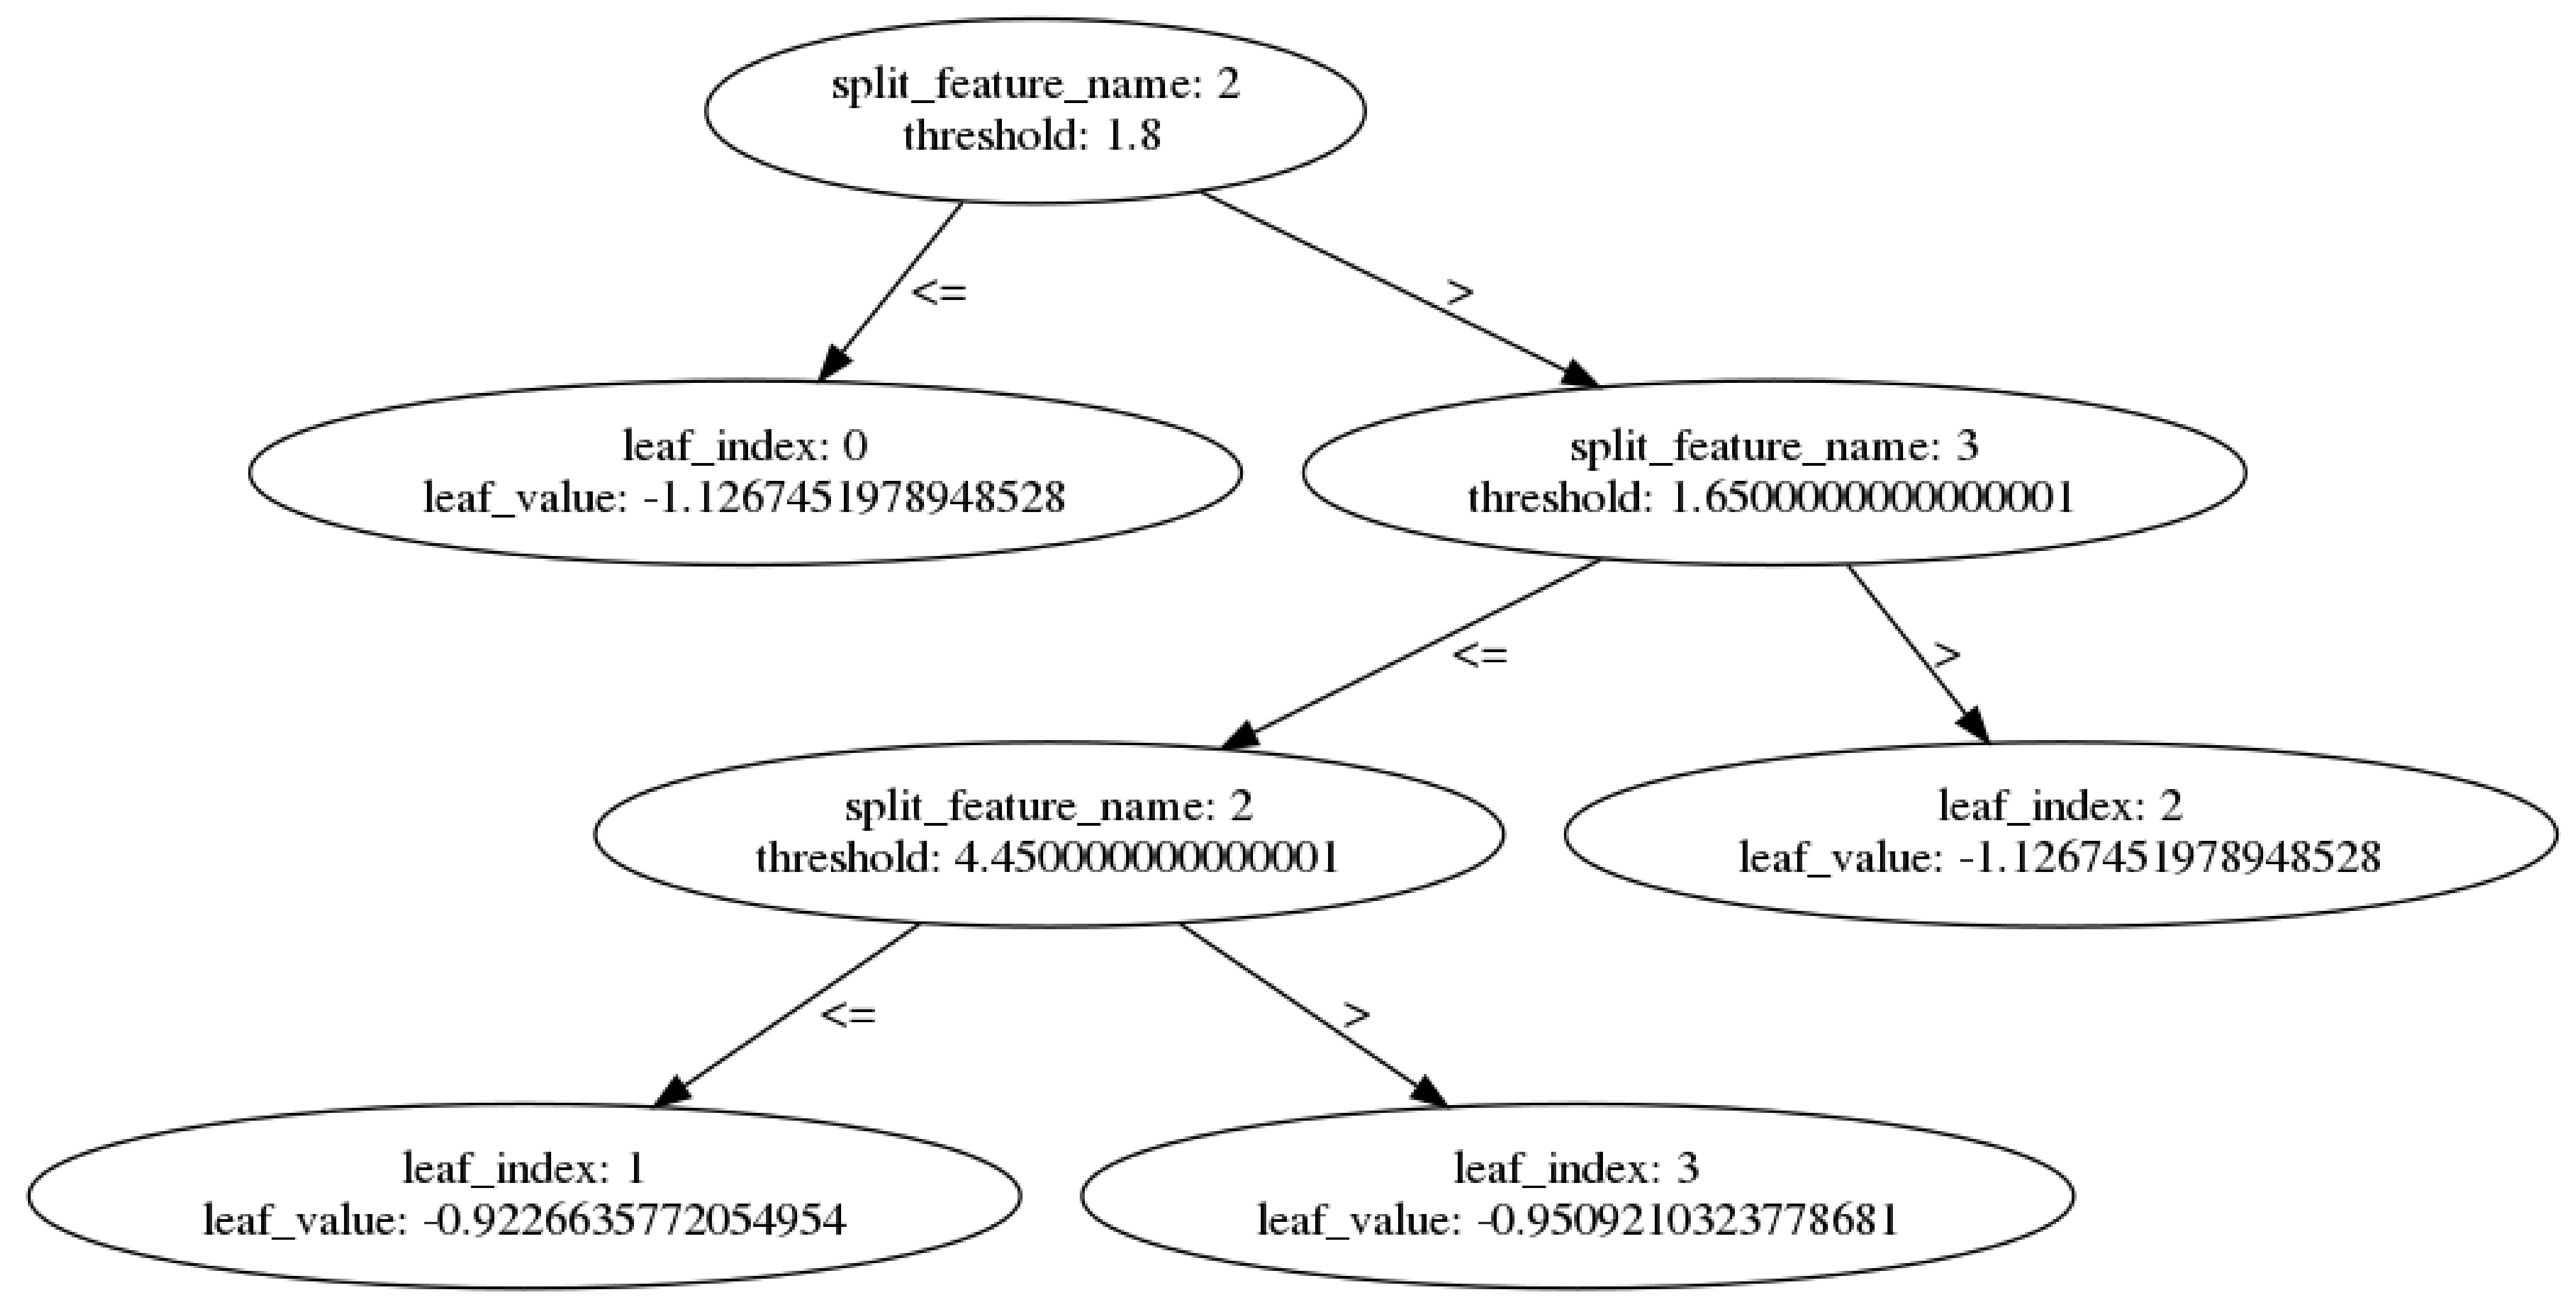

In [34]:
plot_tree(bst, figsize=(100, 100), tree_index=1)

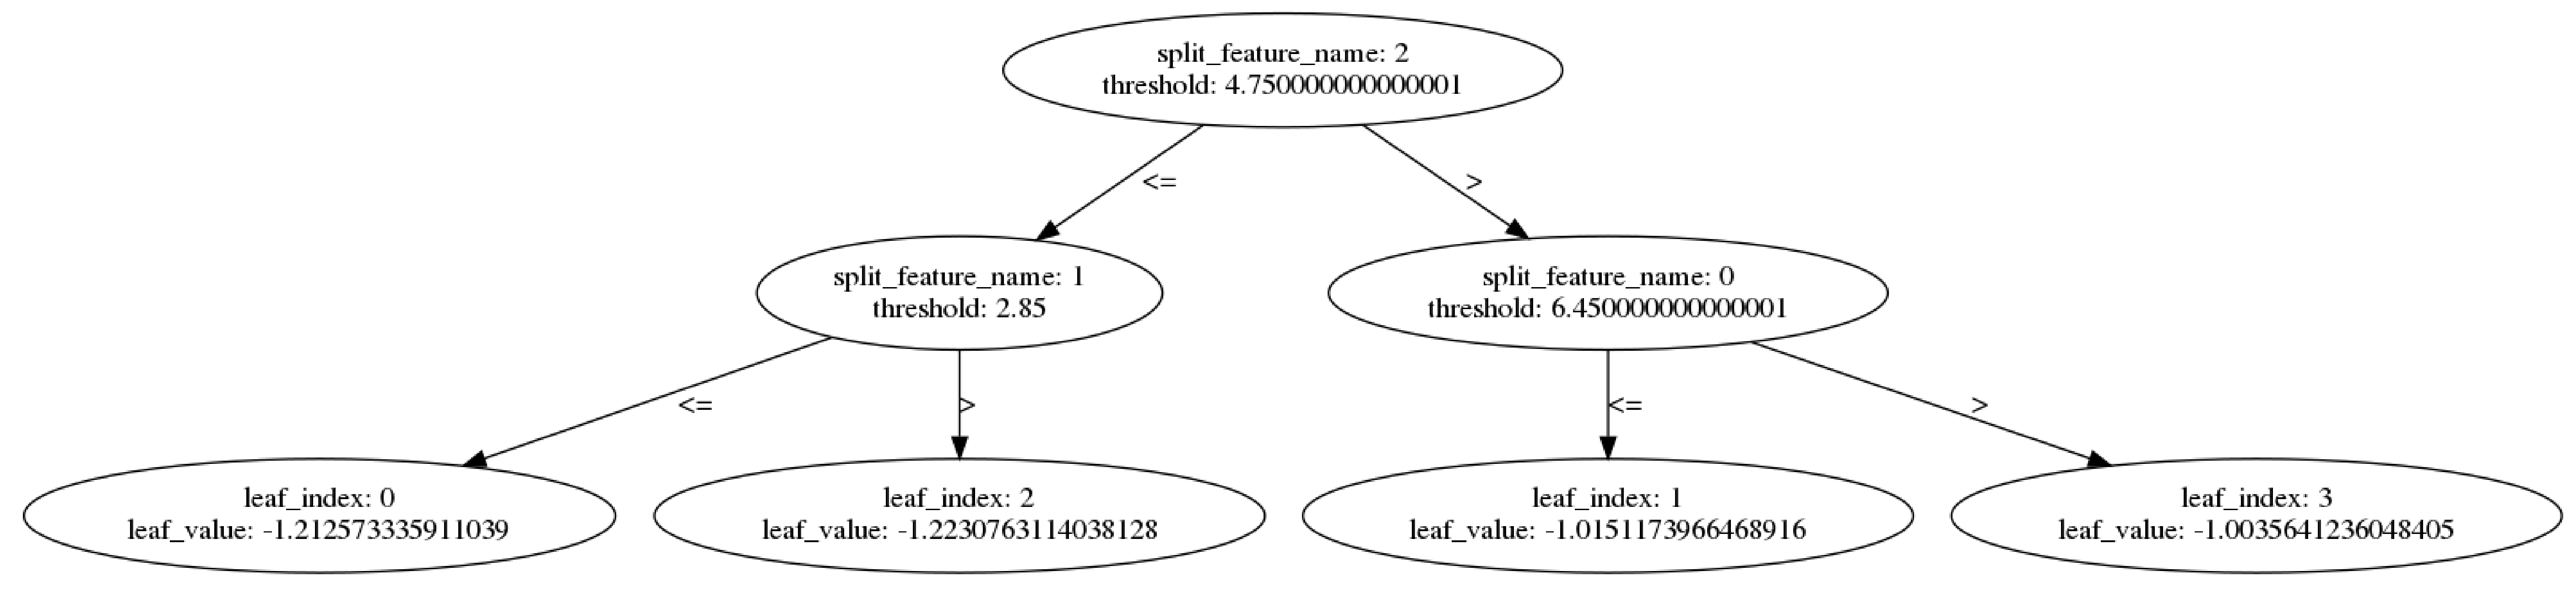

In [35]:
plot_tree(bst, figsize=(100, 100), tree_index=2)

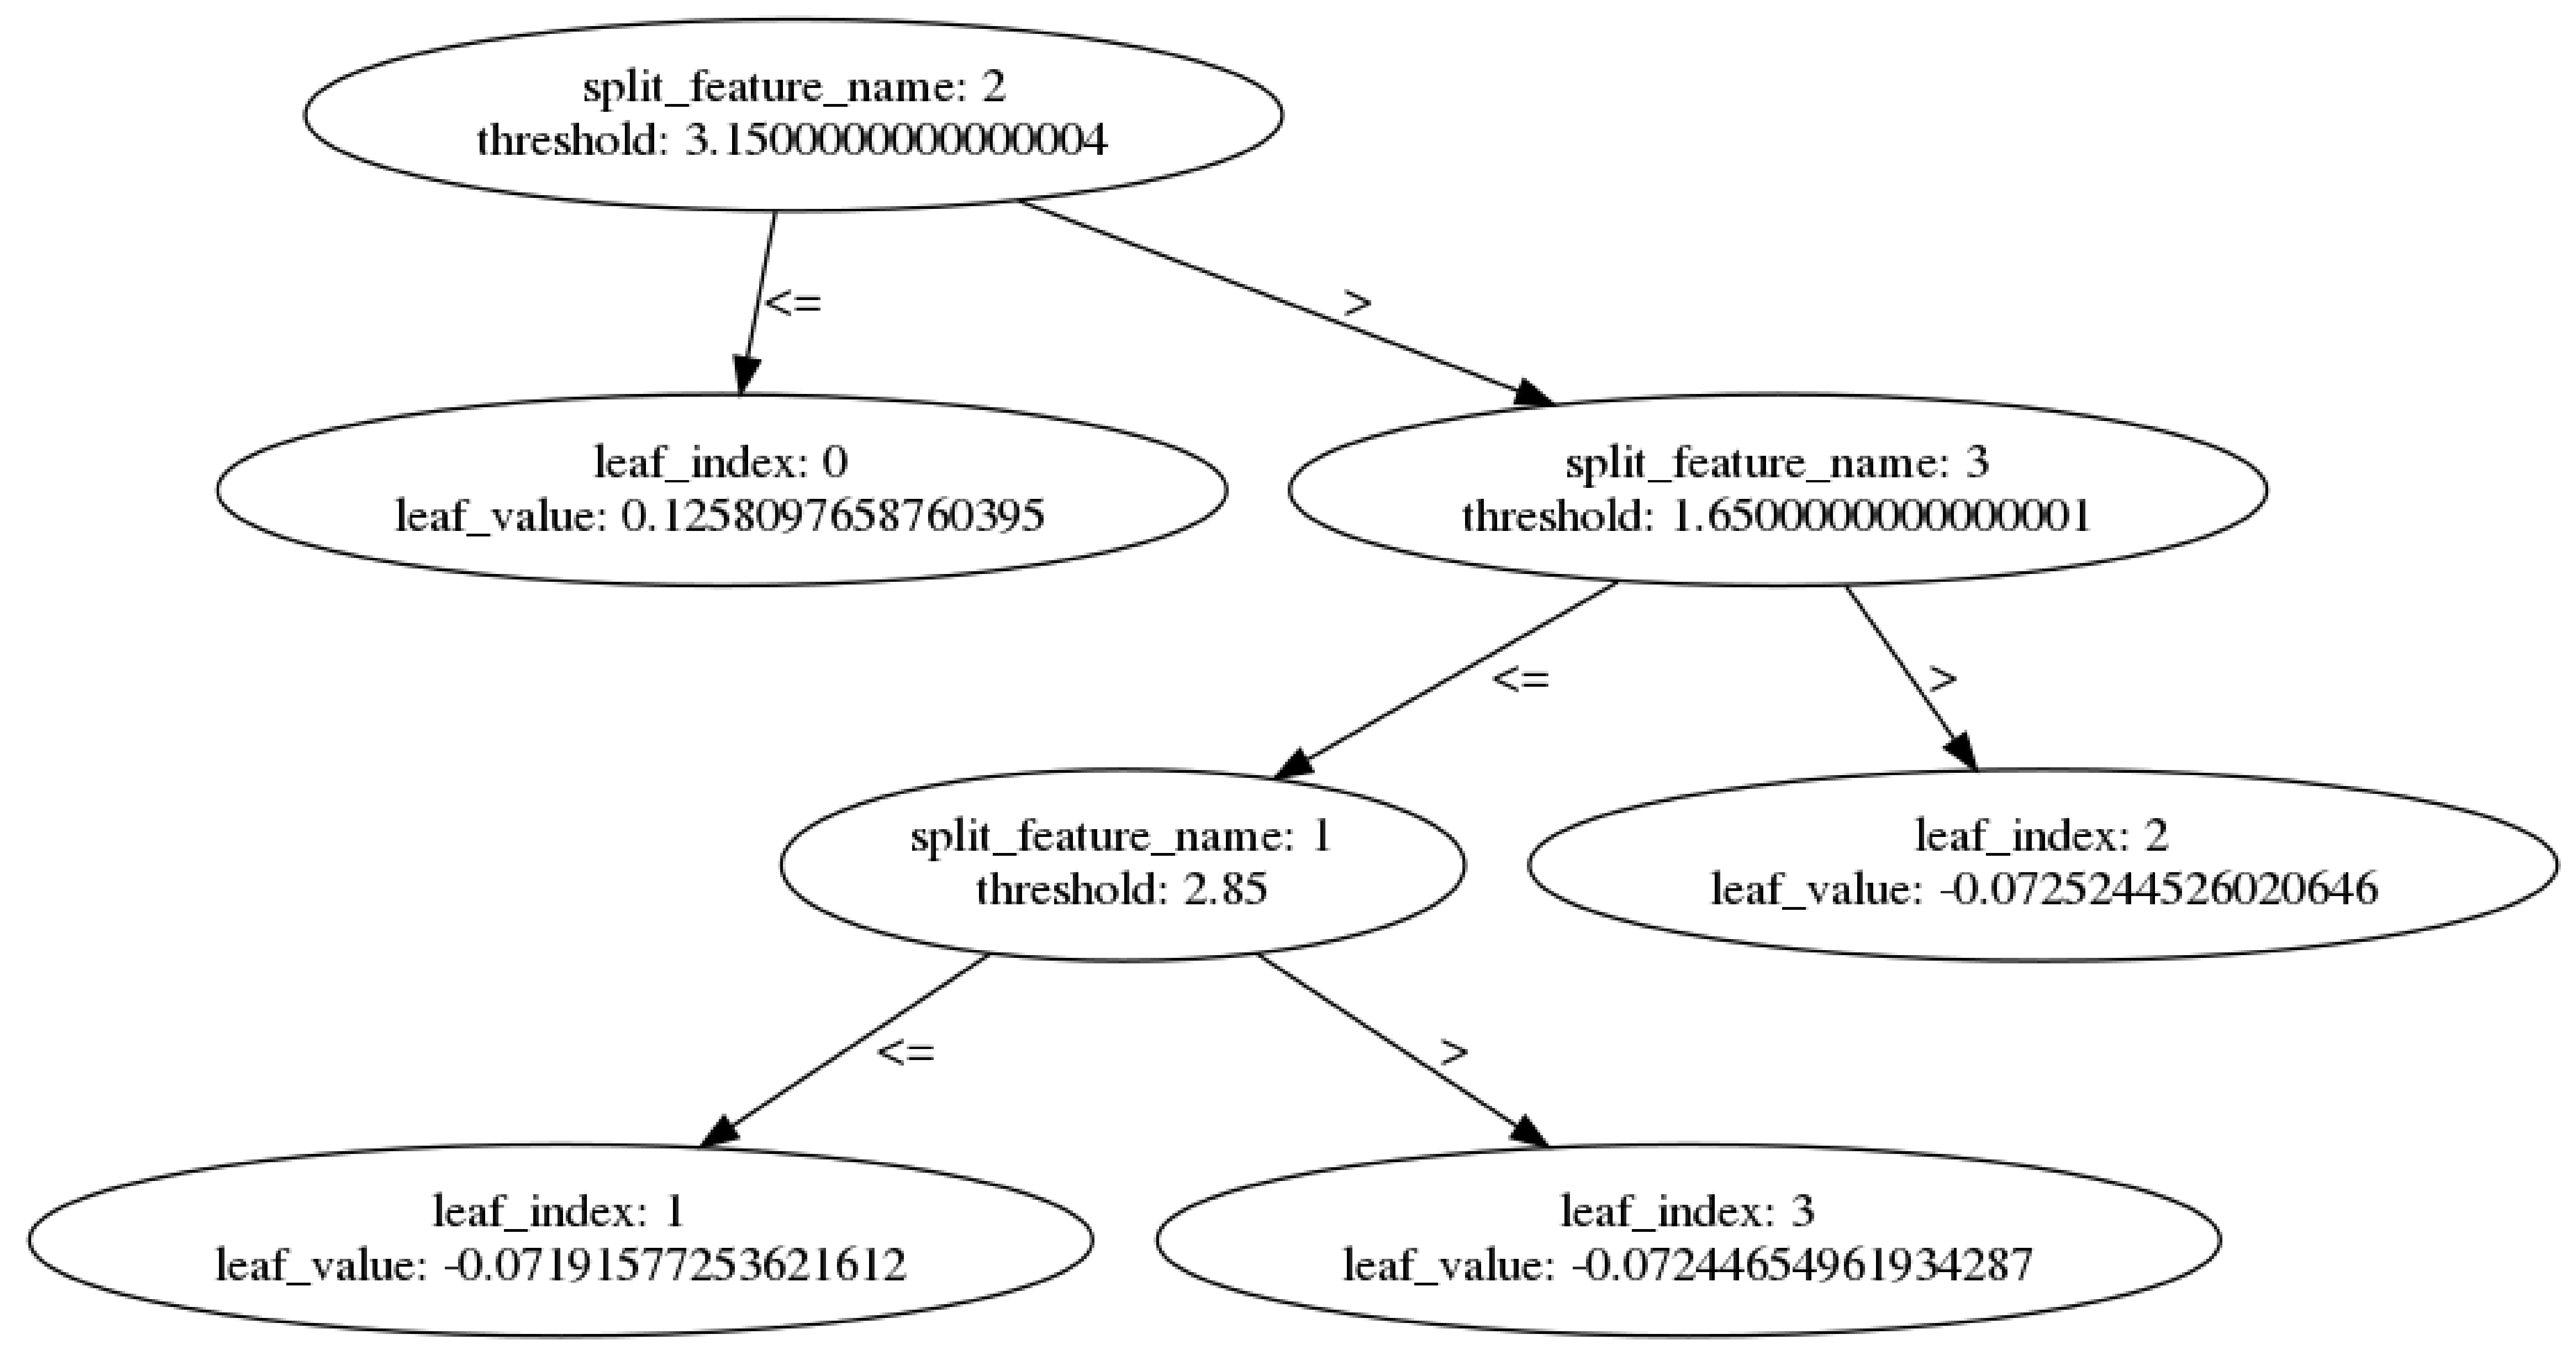

In [36]:
plot_tree(bst, figsize=(100, 100), tree_index=3)

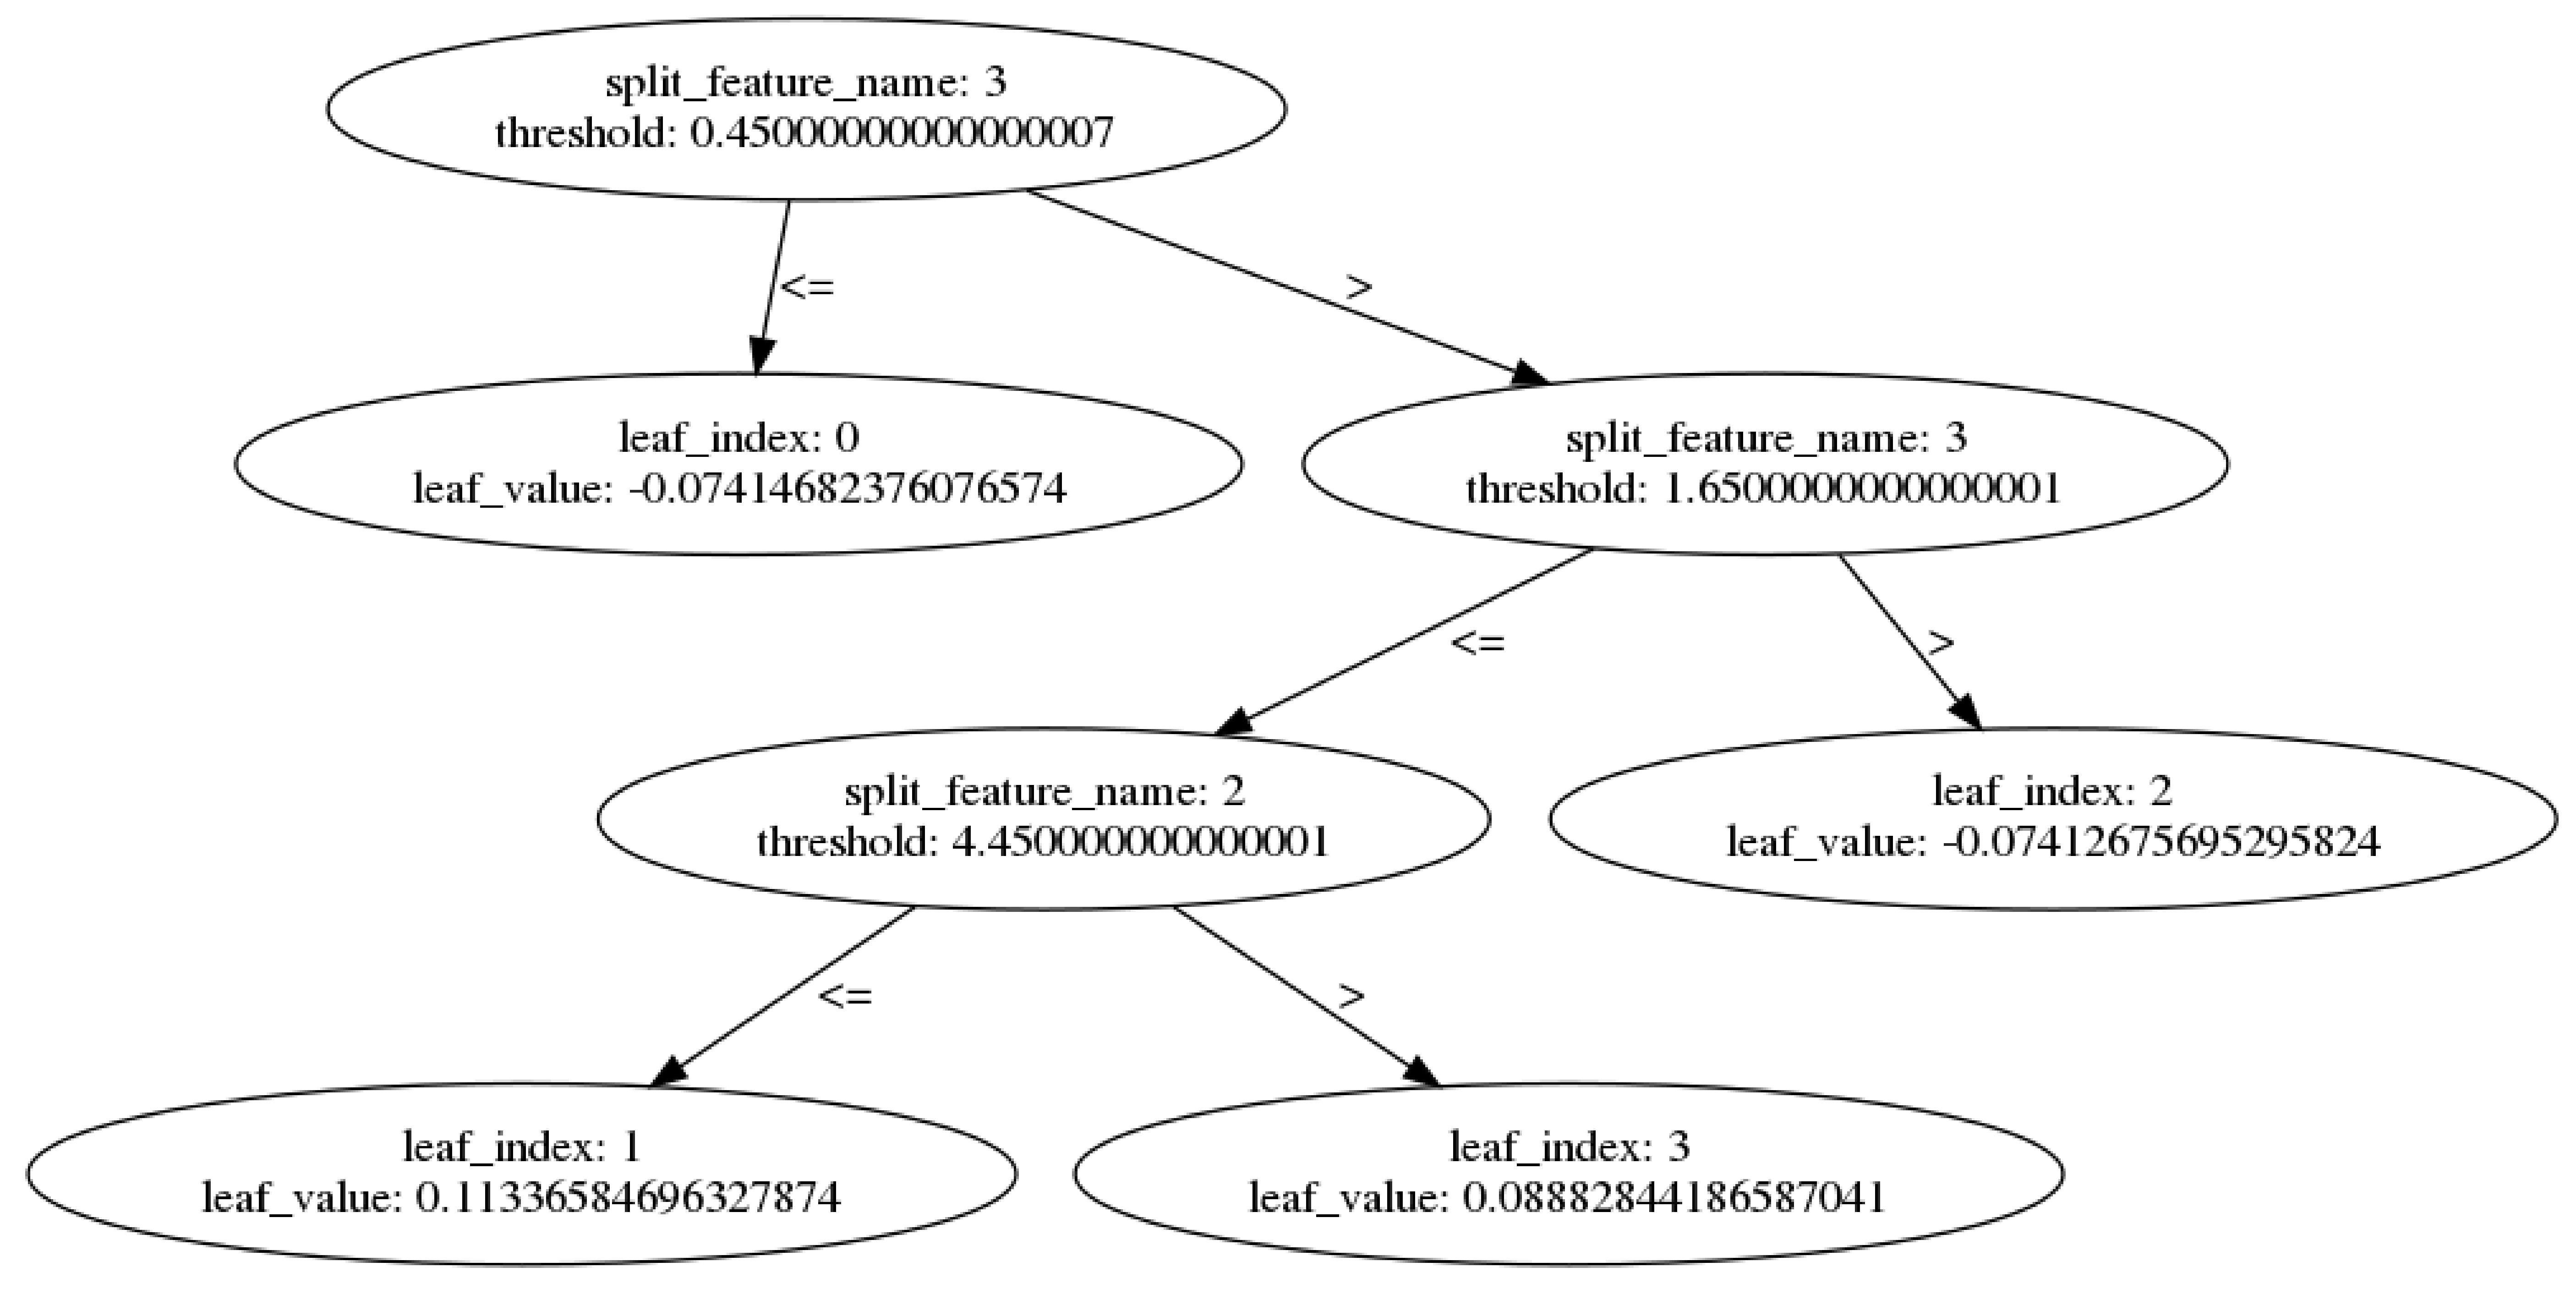

In [37]:
plot_tree(bst, figsize=(100, 100), tree_index=4)

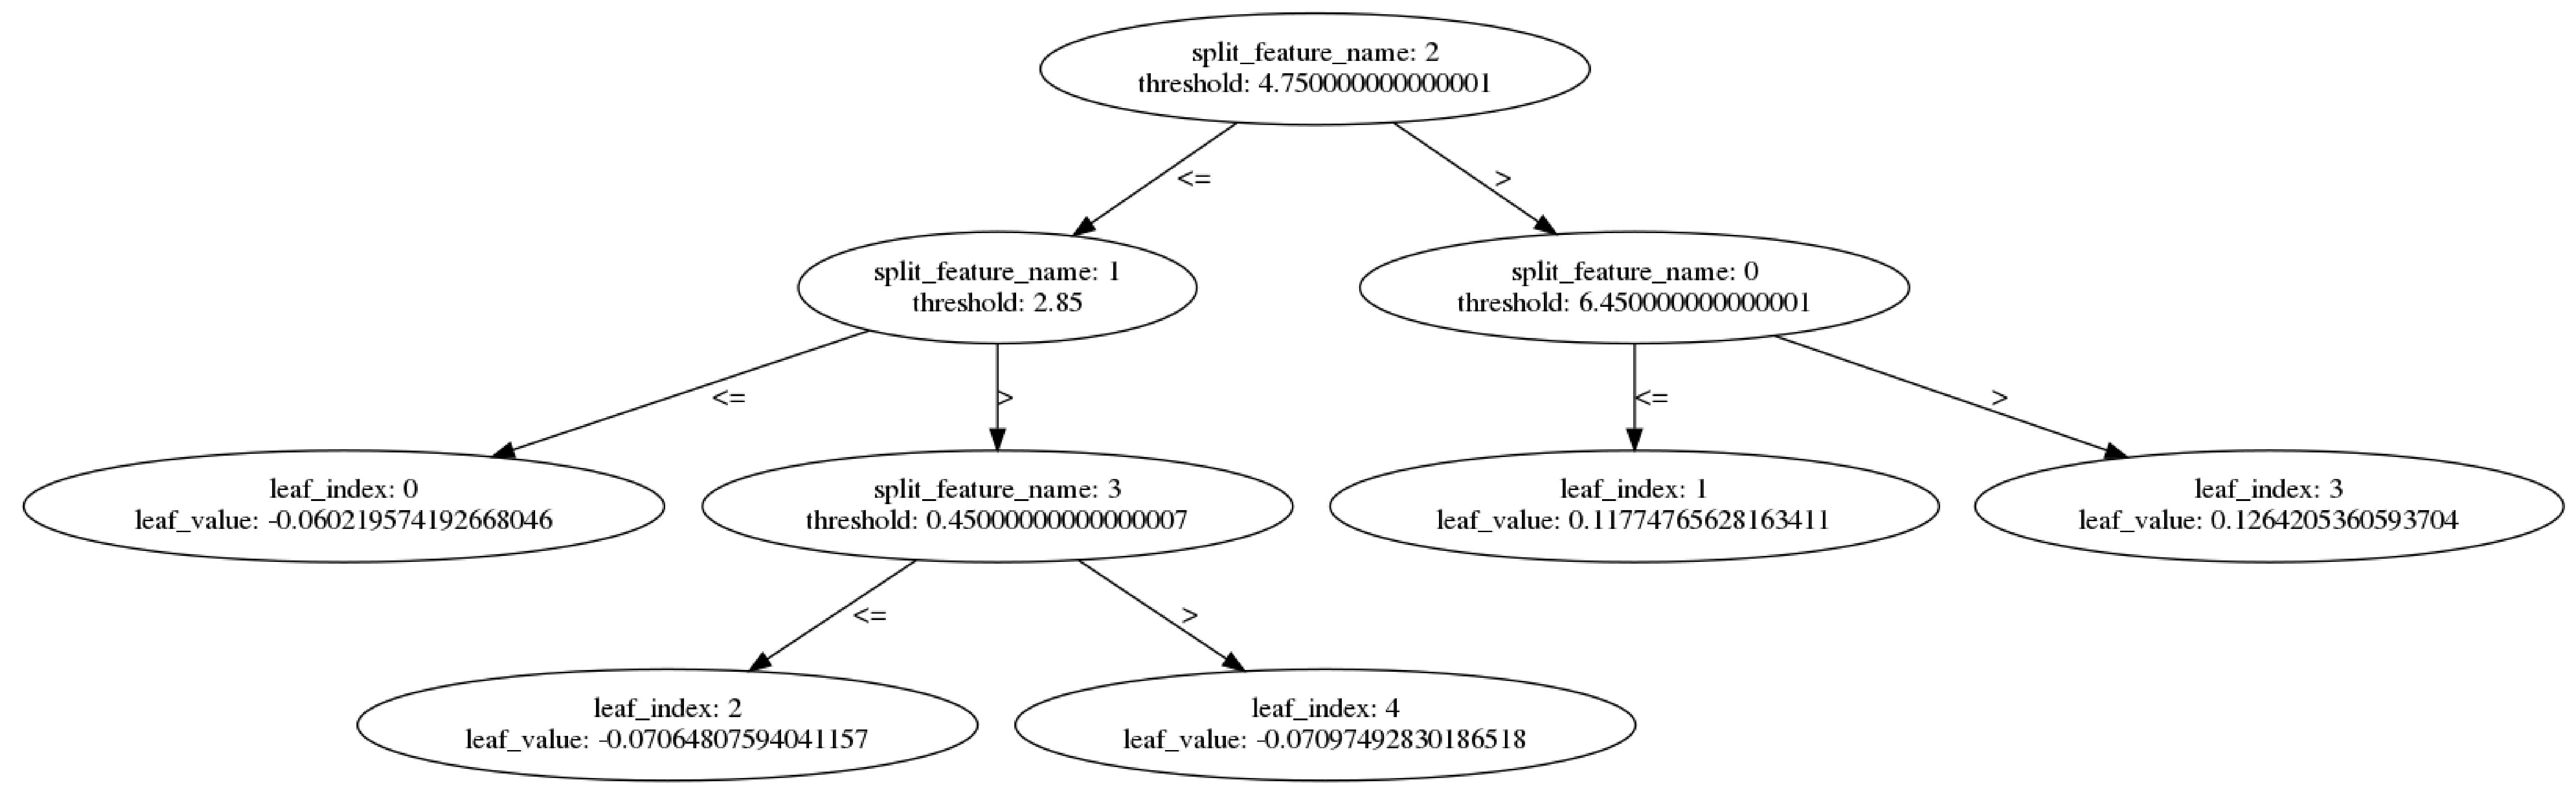

In [38]:
plot_tree(bst, figsize=(100, 100), tree_index=5)

In [40]:
label_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)